<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/6_cornernet_lite/Example%20-%20Person%20Detection%20on%20WIDER%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/6_cornernet_lite/installation
     
 - Select the right requirements file and run
 
     - chmod +x install.sh
     - ./install.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/6_cornernet_lite/installation && chmod +x install_colab.sh && ./install_colab.sh
# Restart colab runtime for installations to get initiated

# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/6_cornernet_lite/installation && chmod +x install.sh && ./install.sh

# About the network

1. Paper on CornerNet: https://arxiv.org/abs/1808.01244

2. Paper on CornerNet-Lite: https://arxiv.org/abs/1904.08900

3. Blog 1 on CornerNet: https://joshua19881228.github.io/2019-01-20-CornerNet/

4. Blog 2 on CornerNet: https://zhangtemplar.github.io/anchor-free-detection/

5. Blog 3 on CornerNet: https://opencv.org/latest-trends-of-object-detection-from-cornernet-to-centernet-explained-part-i-cornernet/

6. Blog 4 on CornerNet: https://towardsdatascience.com/centernet-keypoint-triplets-for-object-detection-review-a314a8e4d4b0

7. Blog 5 on CornerNet: https://medium.com/@andersasac/the-end-of-anchors-improving-object-detection-models-and-annotations-73828c7b39f6

# Get Dataset

 - Credits: https://wider-challenge.org/2019.html

### Training Ground Truth

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1HdPGj59GtosNUQFwcOSFDzHGXQw8NyU6' -O train_bbox.txt

### Training Ignore List

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cj_F48GG5Hd5qxfgIReNPHhlkgf1YxeN' -O train_ignore.txt

### Validation Ground Truth

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1geyoI8mdk2lPH047ajAP65imxwaxm8la' -O val_bbox.txt

### Validation Ignore List

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QqnBhqI1FLih2iZUain_TJP9SfCoujAm' -O val_ignore.txt

### Surveillance Training Images

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nAz-u4hFbs3DP_DacC0RPvLkkIUnRSLV' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nAz-u4hFbs3DP_DacC0RPvLkkIUnRSLV" -O sur_train.tar.gz && rm -rf /tmp/cookies.txt

In [0]:
%%capture
!tar xvf sur_train.tar.gz

### Validation Images

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-nxbaSBK_JnFAOhIkdDPeG0Ho3_IJBq0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-nxbaSBK_JnFAOhIkdDPeG0Ho3_IJBq0" -O val_data.tar.gz && rm -rf /tmp/cookies.txt

In [0]:
%%capture
!tar xvf val_data.tar.gz

# Dataset Prepare

In [0]:
with open("train_bbox.txt") as f:
    gt = f.readlines()

In [0]:
gt = [x.strip() for x in gt]

In [0]:
gt_sur = [p for p in gt if p[:3] == 'sur']

In [ ]:
gt_sur

In [0]:
with open("train_ignore.txt") as o:
    gt_ignore = o.readlines()

In [0]:
gt_ignore = [p.strip() for p in gt_ignore]

In [0]:
gt_ignore_sur = [p for p in gt_ignore if p[:3] == 'sur']

In [0]:
len(gt_ignore_sur)

5759

In [ ]:
gt_ignore_sur

In [0]:
with open("val_bbox.txt") as g:
    val = g.readlines()

In [0]:
val = [y.strip() for y in val]

In [0]:
val_sur = [z for z in val if z[:3] == 'sur']

In [ ]:
val_sur

In [0]:
with open("val_ignore.txt") as o:
    val_ignore = o.readlines()

In [0]:
val_ignore = [y.strip() for y in val_ignore]

In [0]:
val_ignore_sur = [z for z in val_ignore if z[:3] == 'sur']

In [0]:
len(val_ignore_sur)

2481

In [0]:
len(val)

5000

In [0]:
len(val_sur)

2481

In [0]:
len(gt)

91500

In [0]:
len(gt_sur)

5759

In [0]:
from glob import glob

In [0]:
imgList = glob("sur_train/*.jpg")

In [0]:
len(imgList)

5759

In [0]:
from tqdm import tqdm

In [0]:
h = open("train_labels.csv",'w')
from itertools import chain
h.write("Id,Labels\n")
for a in tqdm(gt_sur):
  out_list = a.split(' ')
  img_name = out_list[0]
  bboxes = out_list[1:]
  if len(bboxes) != 0:
    temp = bboxes
    for q in range(0,len(temp),4):
      x1 = int(temp[q])
      y1 = int(temp[q+1])
      wd = int(temp[q+2])
      ht = int(temp[q+3])
      x2 = x1 + wd
      y2 = y1 + ht
      temp[q] = str(x1)
      temp[q+1] = str(y1)
      temp[q+2] = str(x2)
      temp[q+3] = str(y2)
    bboxes = temp
    #print(bboxes)
    n_boxes = len(bboxes)//4
    k = 'person'
    N = 4
    res = list(chain(*[bboxes[i : i+N] + [k]  
              if len(bboxes[i : i+N]) == N  
              else bboxes[i : i+N]  
              for i in range(0, len(bboxes), N)]))

    res_str = ' '.join(res)
    #print(res_str)
    res_str = img_name + ',' + res_str
    h.write(res_str+'\n')
h.close()

100%|██████████| 5759/5759 [00:00<00:00, 33921.51it/s]


In [ ]:
h = open("val_labels.csv",'w')
from itertools import chain
h.write("Id,Labels\n")
for a in val_sur:
  out_list = a.split(' ')
  img_name = out_list[0]
  bboxes = out_list[1:]
  if len(bboxes) != 0:
    temp = bboxes
    for q in range(0,len(temp),4):
      x1 = int(temp[q])
      y1 = int(temp[q+1])
      wd = int(temp[q+2])
      ht = int(temp[q+3])
      x2 = x1 + wd
      y2 = y1 + ht
      temp[q] = str(x1)
      temp[q+1] = str(y1)
      temp[q+2] = str(x2)
      temp[q+3] = str(y2)
    bboxes = temp
    #print(bboxes)
    n_boxes = len(bboxes)//4
    k = 'person'
    N = 4
    res = list(chain(*[bboxes[i : i+N] + [k]  
              if len(bboxes[i : i+N]) == N  
              else bboxes[i : i+N]  
              for i in range(0, len(bboxes), N)]))

    res_str = ' '.join(res)
  
    res_str = img_name + ',' + res_str
    print(res_str)
    h.write(res_str+'\n')
h.close()

In [0]:
!mkdir person
!mkdir person/Images
!mkdir person/Train
!mkdir person/Val

mkdir: cannot create directory ‘person’: File exists
mkdir: cannot create directory ‘person/Images’: File exists
mkdir: cannot create directory ‘person/Train’: File exists
mkdir: cannot create directory ‘person/Val’: File exists


In [0]:
import shutil
from tqdm import tqdm

for m in tqdm(gt_sur):
    out_list = m.split(' ')
    img_name = out_list[0]
    inPath = "./sur_train/{}".format(img_name)
    outPath = "./person/Train/{}".format(img_name)
    shutil.copy(inPath,outPath)

100%|██████████| 5759/5759 [01:05<00:00, 88.45it/s]


In [0]:
for n in tqdm(val_sur):
    out_list = n.split(' ')
    img_name = out_list[0]
    inPath = "./val_data/{}".format(img_name)
    outPath = "./person/Val/{}".format(img_name)
    shutil.copy(inPath,outPath)

100%|██████████| 2481/2481 [00:30<00:00, 80.07it/s]


In [0]:
!mv train_labels.csv ./person/train_labels.csv
!mv val_labels.csv ./person/val_labels.csv

# Monk 2 COCO

# COCO Format - 1

## Example Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------ship (coco_dir) 
          |         |
          |         |----images (img_dir)
          |                |
          |                |------Train (set_dir) (Train)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Train.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "ship";
 - img_dir = "images";
 - set_dir = "Train";

 

# COCO Format - 2

## Example Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          
          |------ship (coco_dir) 
          |         |
          |         |---ImagesTrain (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_ImagesTrain.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "ship";
 - img_dir = "./";
 - set_dir = "ImagesTrain";

 
 Note: Annotation file name too coincides against the set_dir

### Generate Training COCO labels

In [ ]:
!pip install dicttoxml

In [0]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [0]:
root = "./person/";
img_dir = "Train/";
anno_file = "train_labels.csv";

In [0]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

In [0]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [0]:
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

In [0]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [0]:
df = pd.read_csv(input_annotations_path);
df.dropna()
columns = df.columns

In [0]:
delimiter = " ";

In [0]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 1/1 [00:00<00:00, 1916.96it/s]


In [0]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

100%|██████████| 5563/5563 [01:44<00:00, 53.19it/s]


### Generate Validation COCO Labels

In [0]:
root = "./person/";
img_dir = "Val/";
anno_file = "val_labels.csv";

In [0]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

In [0]:
def convertMonk2COCO(annotations_path,images_folder,img_dir):
  if not os.path.isdir(annotations_path):
      os.mkdir(annotations_path)
      
  input_images_folder = images_folder;
  input_annotations_path = root + "/" + anno_file;

  output_dataset_path = root;
  output_image_folder = input_images_folder;
  output_annotation_folder = annotations_path;

  tmp = img_dir.replace("/", "");
  output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
  output_classes_file = output_annotation_folder + "/classes.txt";

  if not os.path.isdir(output_annotation_folder):
      os.mkdir(output_annotation_folder);

  df = pd.read_csv(input_annotations_path);
  df.dropna()
  columns = df.columns
  delimiter = " ";
  list_dict = [];
  anno = [];
  for i in range(len(df)):
      img_name = df[columns[0]][i];
      labels = df[columns[1]][i];
      tmp = labels.split(delimiter);
      for j in range(len(tmp)//5):
          label = tmp[j*5+4];
          if(label not in anno):
              anno.append(label);
      anno = sorted(anno)
      
  for i in tqdm(range(len(anno))):
      tmp = {};
      tmp["supercategory"] = "master";
      tmp["id"] = i;
      tmp["name"] = anno[i];
      list_dict.append(tmp);

  anno_f = open(output_classes_file, 'w');
  for i in range(len(anno)):
      anno_f.write(anno[i] + "\n");
  anno_f.close();

  coco_data = {};
  coco_data["type"] = "instances";
  coco_data["images"] = [];
  coco_data["annotations"] = [];
  coco_data["categories"] = list_dict;
  image_id = 0;
  annotation_id = 0;


  for i in tqdm(range(len(df))):
      img_name = df[columns[0]][i];
      labels = df[columns[1]][i];
      tmp = labels.split(delimiter);
      image_in_path = input_images_folder + "/" + img_name;
      img = cv2.imread(image_in_path, 1);
      h, w, c = img.shape;

      images_tmp = {};
      images_tmp["file_name"] = img_name;
      images_tmp["height"] = h;
      images_tmp["width"] = w;
      images_tmp["id"] = image_id;
      coco_data["images"].append(images_tmp);
      

      for j in range(len(tmp)//5):
          x1 = int(tmp[j*5+0]);
          y1 = int(tmp[j*5+1]);
          x2 = int(tmp[j*5+2]);
          y2 = int(tmp[j*5+3]);
          label = tmp[j*5+4];
          annotations_tmp = {};
          annotations_tmp["id"] = annotation_id;
          annotation_id += 1;
          annotations_tmp["image_id"] = image_id;
          annotations_tmp["segmentation"] = [];
          annotations_tmp["ignore"] = 0;
          annotations_tmp["area"] = (x2-x1)*(y2-y1);
          annotations_tmp["iscrowd"] = 0;
          annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
          annotations_tmp["category_id"] = anno.index(label);

          coco_data["annotations"].append(annotations_tmp)
      image_id += 1;

  outfile =  open(output_annotation_file, 'w');
  json_str = json.dumps(coco_data, indent=4);
  outfile.write(json_str);
  outfile.close();



In [0]:
convertMonk2COCO(annotations_path=annotations_path,images_folder=images_folder,img_dir=img_dir)

100%|██████████| 2369/2369 [00:43<00:00, 54.11it/s]


# Training

## **NOTE** Restart Runtime (Is using colab)

In [0]:
import os
import sys

In [0]:
sys.path.append("Monk_Object_Detection/6_cornernet_lite/lib/")

In [0]:
from train_detector import Detector

In [0]:
gtf = Detector();

In [0]:
root_dir = "./";
coco_dir = "./person"
img_dir = ""
set_dir = "Train"

In [0]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, use_gpu=True, num_workers=12)

In [0]:
root_dir = "./";
coco_dir = "./person"
img_dir = ""
set_dir = "Val"

In [0]:
gtf.Val_Dataset(root_dir, coco_dir, img_dir, set_dir)

In [0]:
gtf.Model(model_name="CornerNet_Saccade")

In [0]:
gtf.Hyper_Params(lr=0.0001, total_iterations=100000, val_interval=1000)

In [0]:
gtf.Setup();

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.25s)
creating index...
index created!
loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
loading annotations into memory...
Done (t=0.31s)
creating index...
index created!
loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
loading annotations into memory...
Done (t=0.36s)
creating index...
index created!
loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
load

In [ ]:
gtf.Train();

# Inference

In [1]:
import os
import sys
sys.path.append("../../6_cornernet_lite/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
class_list = ["person"]
gtf.Model(class_list, 
          base="CornerNet_Saccade", 
          model_path="./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_best.pkl")

total parameters: 116847521
loading from ./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_best.pkl


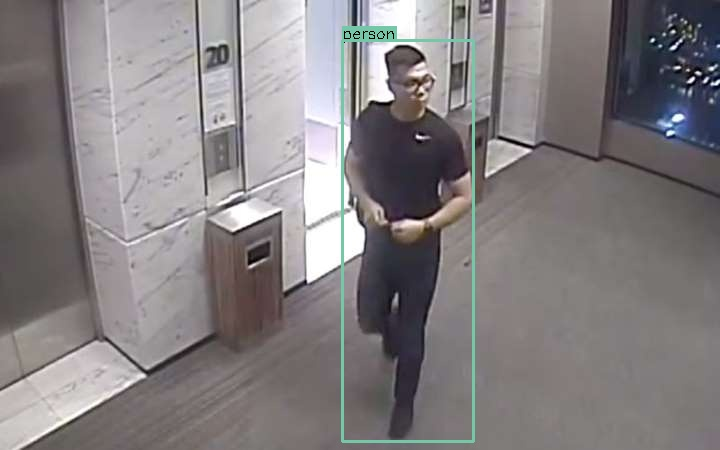

In [7]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img1.jpeg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

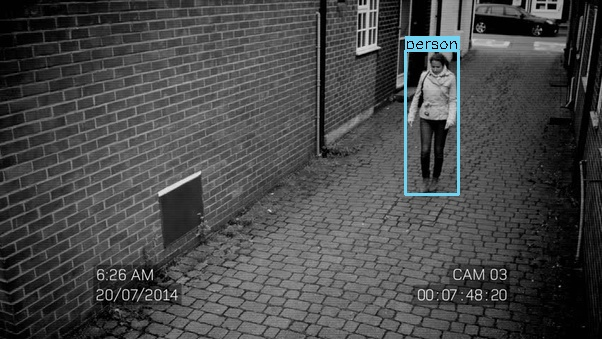

In [9]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img2.jpeg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

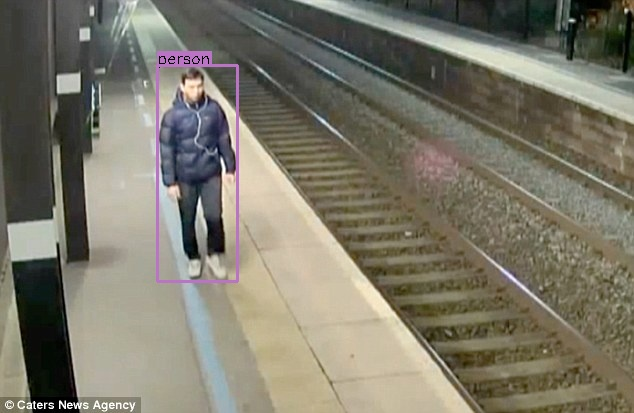

In [11]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img3.jpg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

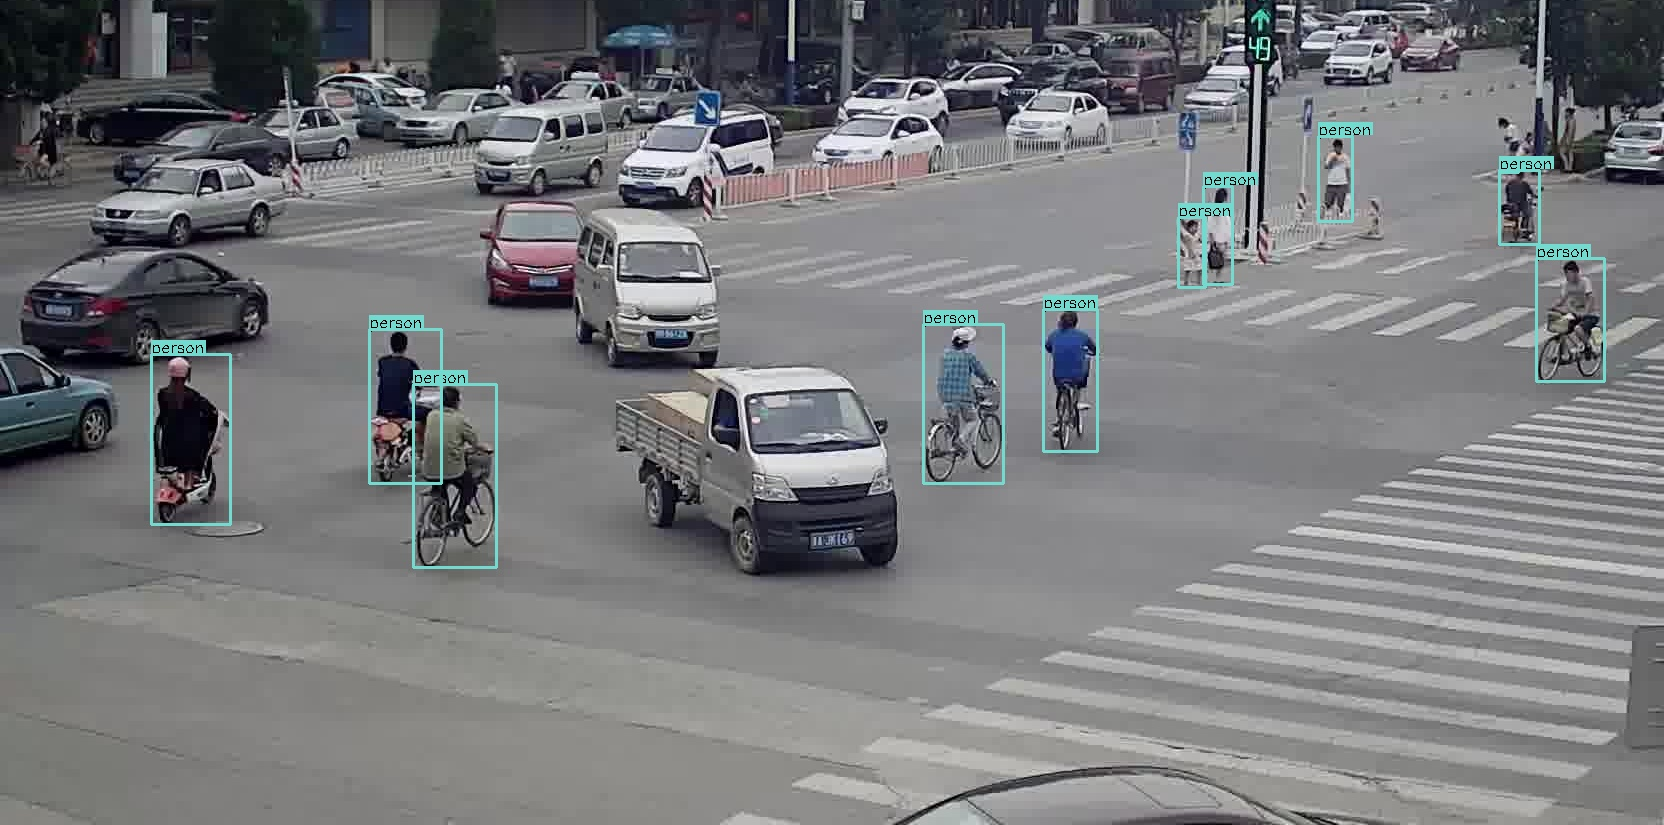

In [12]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img4.jpg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

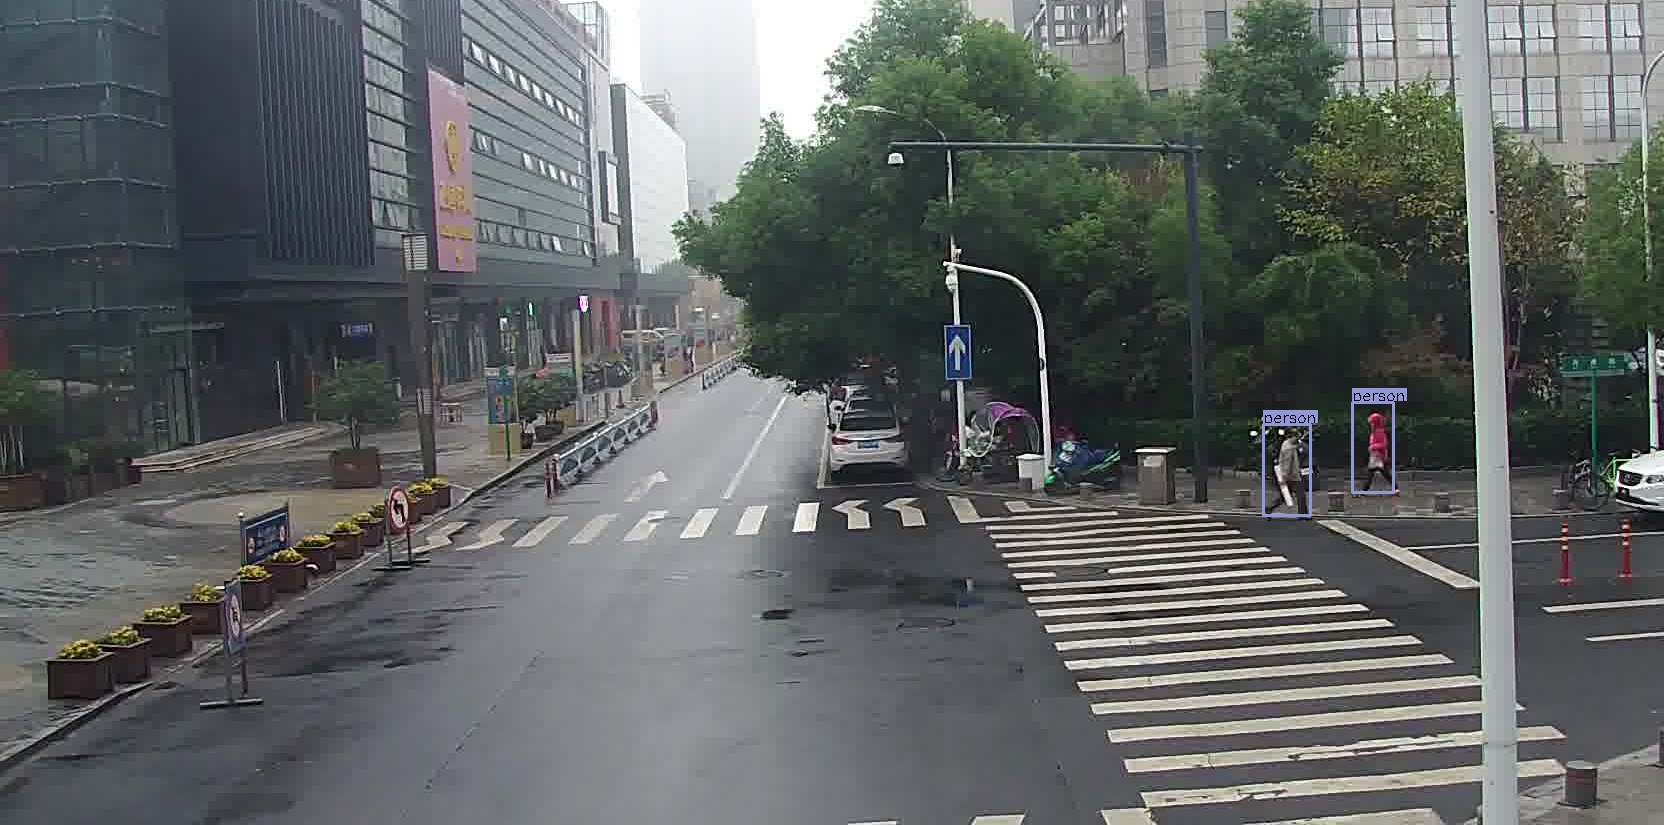

In [15]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img5.jpg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

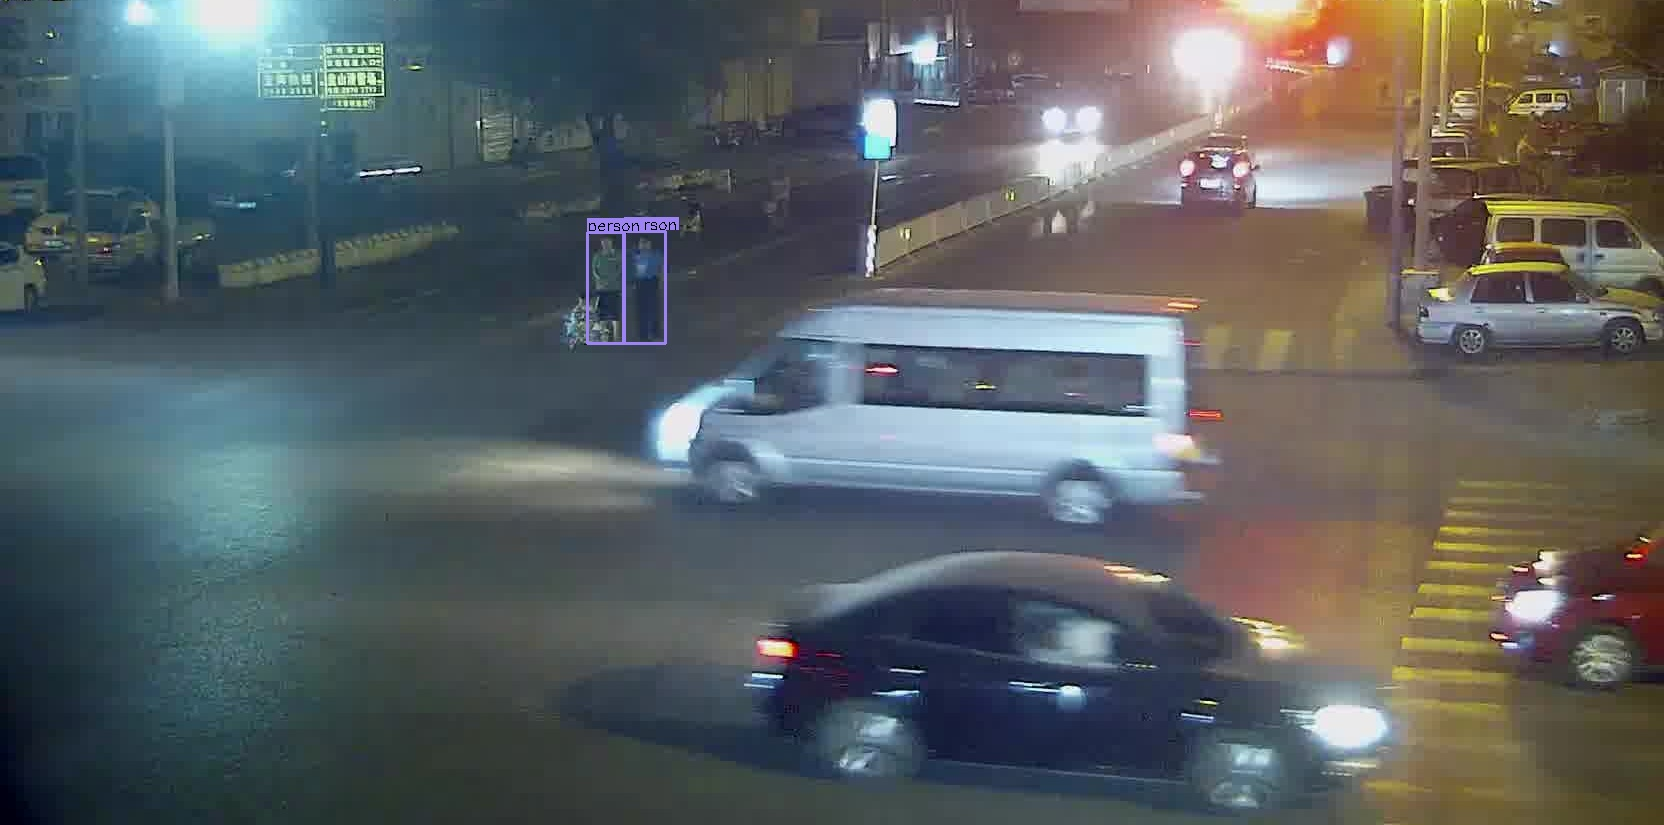

In [19]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img6.jpg", vis_thresh=0.512, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

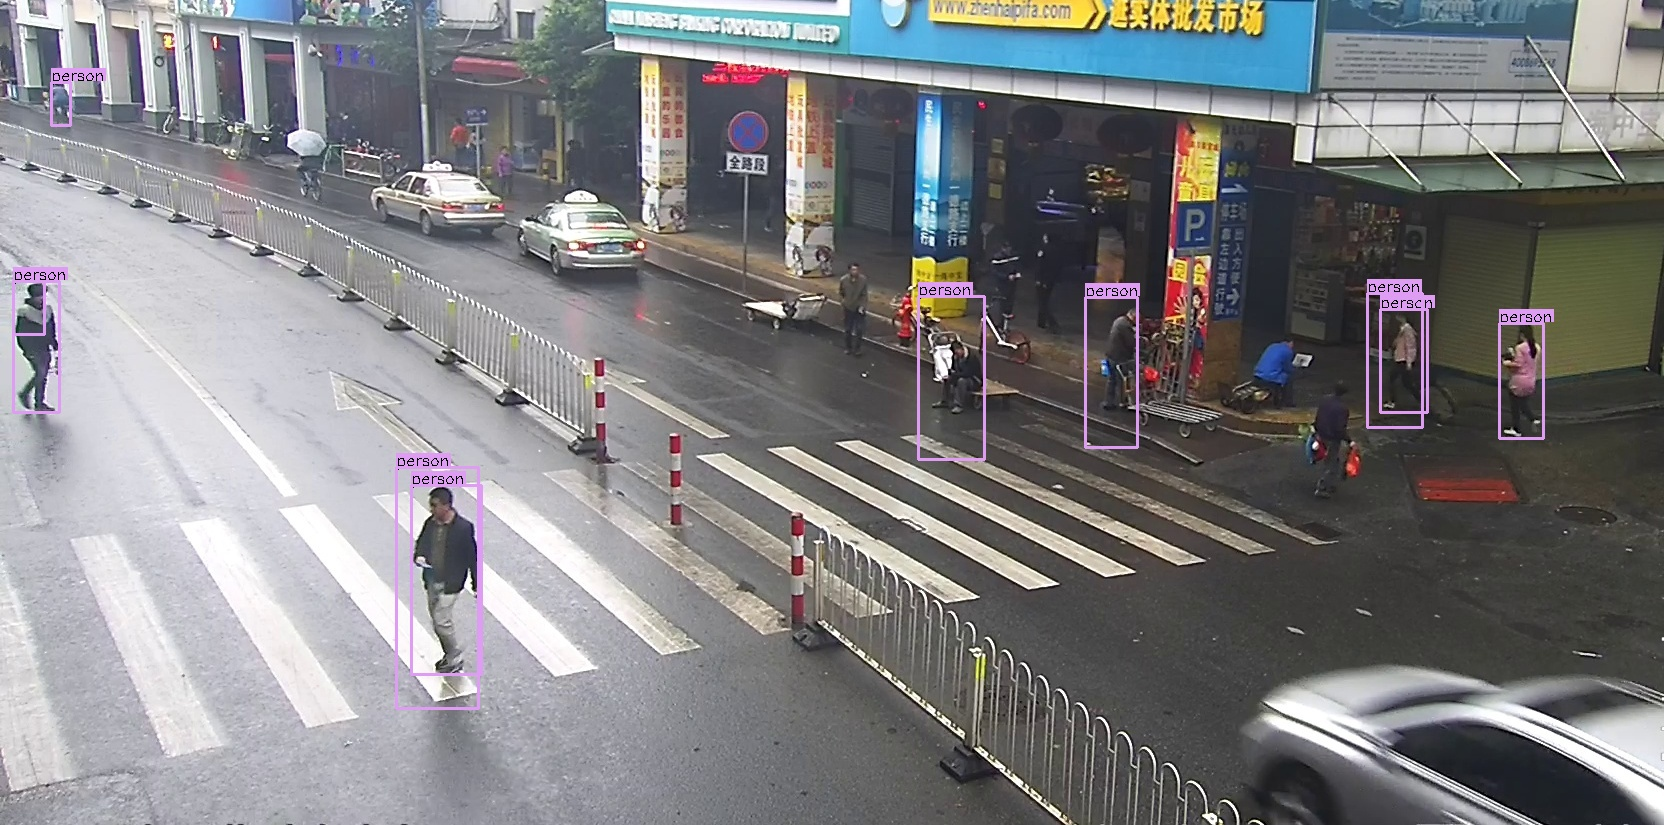

In [24]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img7.jpg", vis_thresh=0.3, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

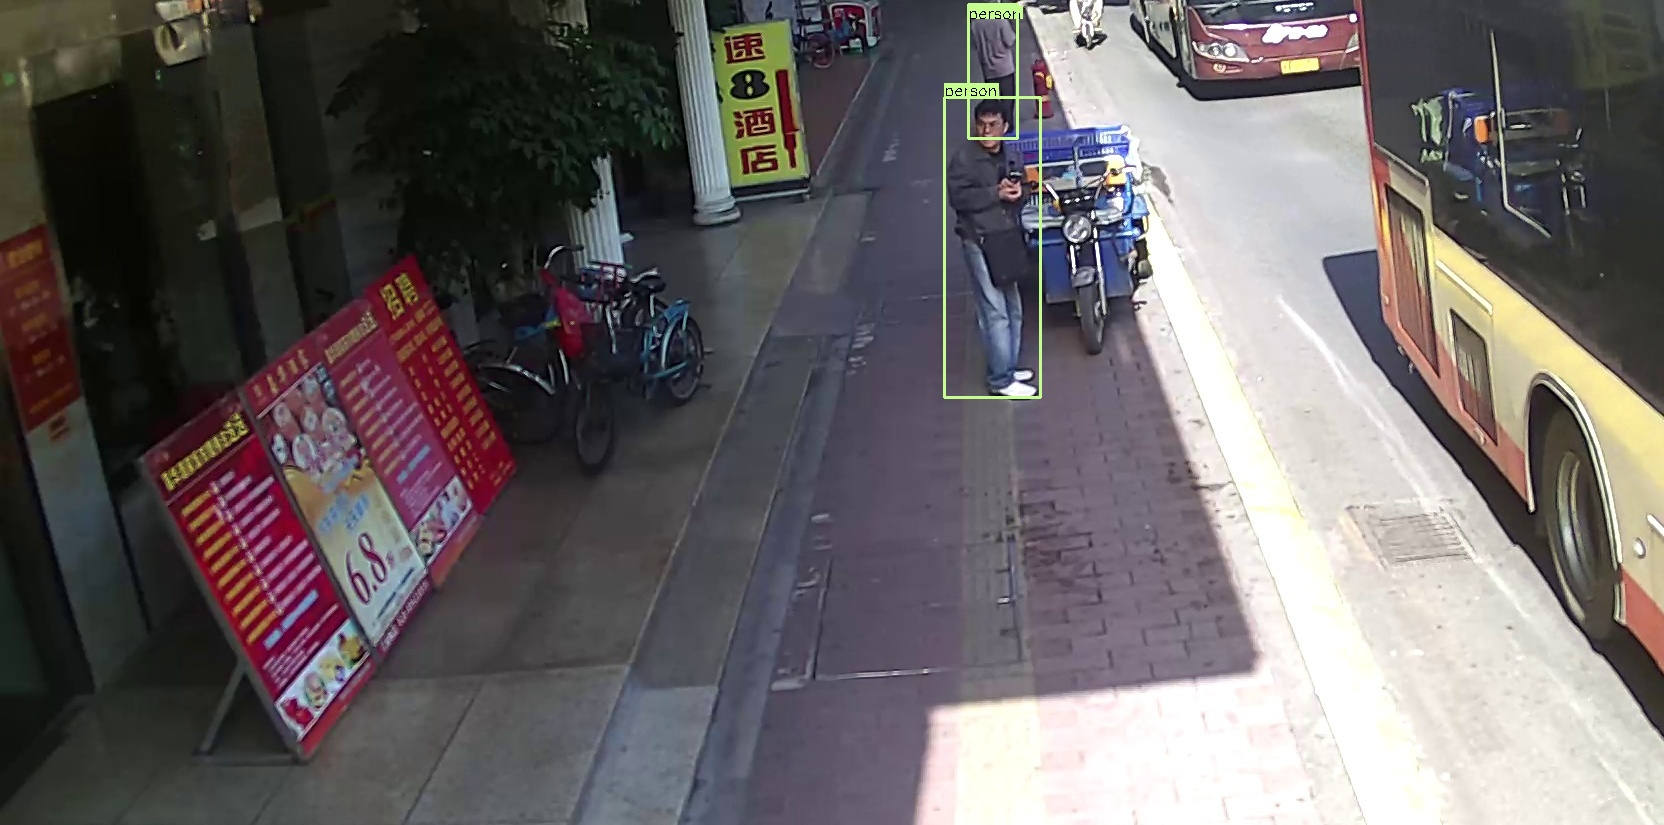

In [30]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img8.jpg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

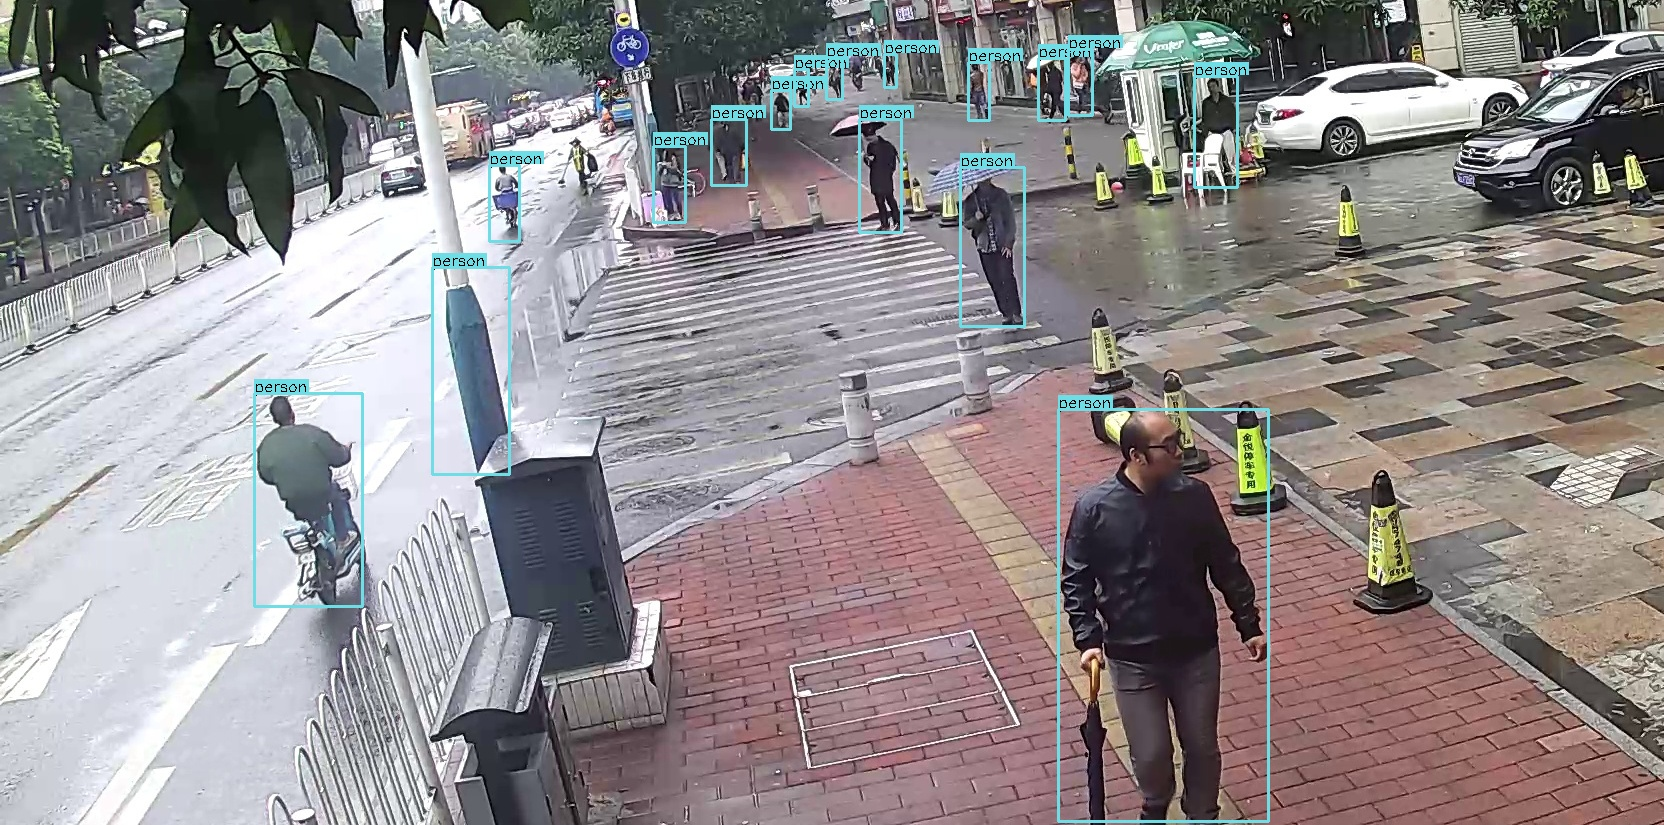

In [32]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img9.jpg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

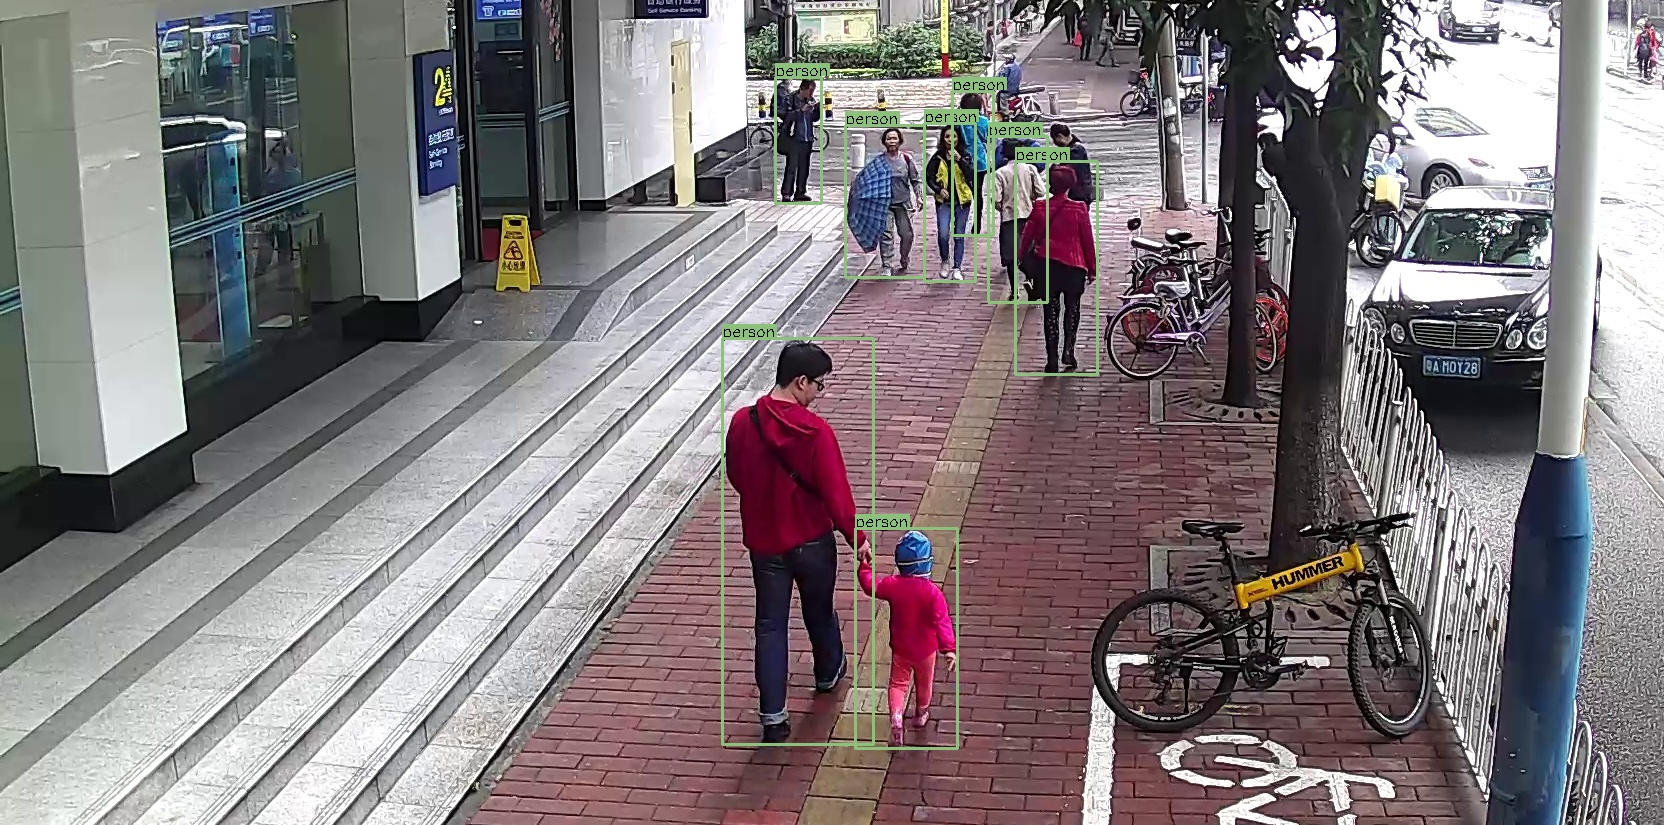

In [35]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img10.jpg", vis_thresh=0.5, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

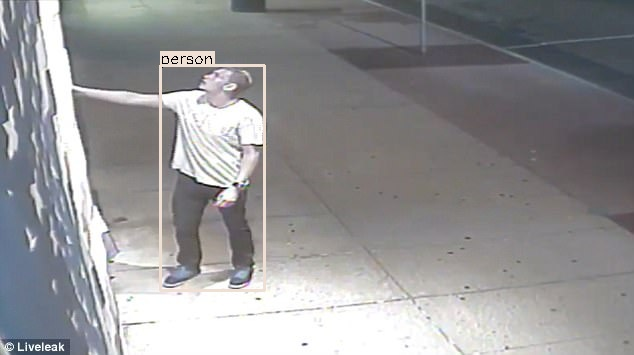

In [36]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img11.jpg", vis_thresh=0.5, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

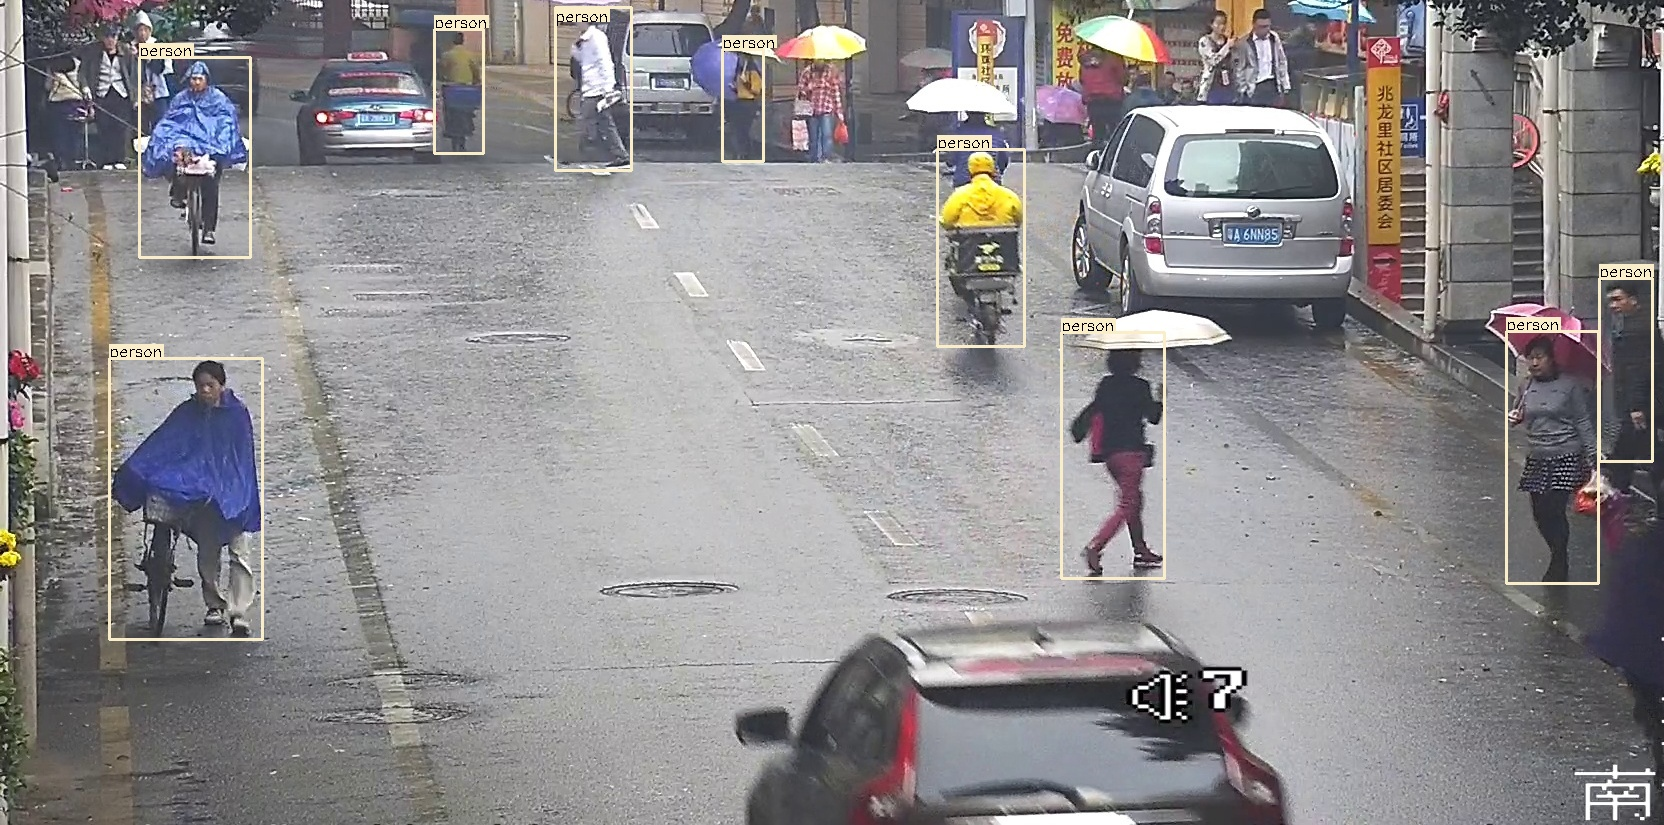

In [37]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img12.jpg", vis_thresh=0.5, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

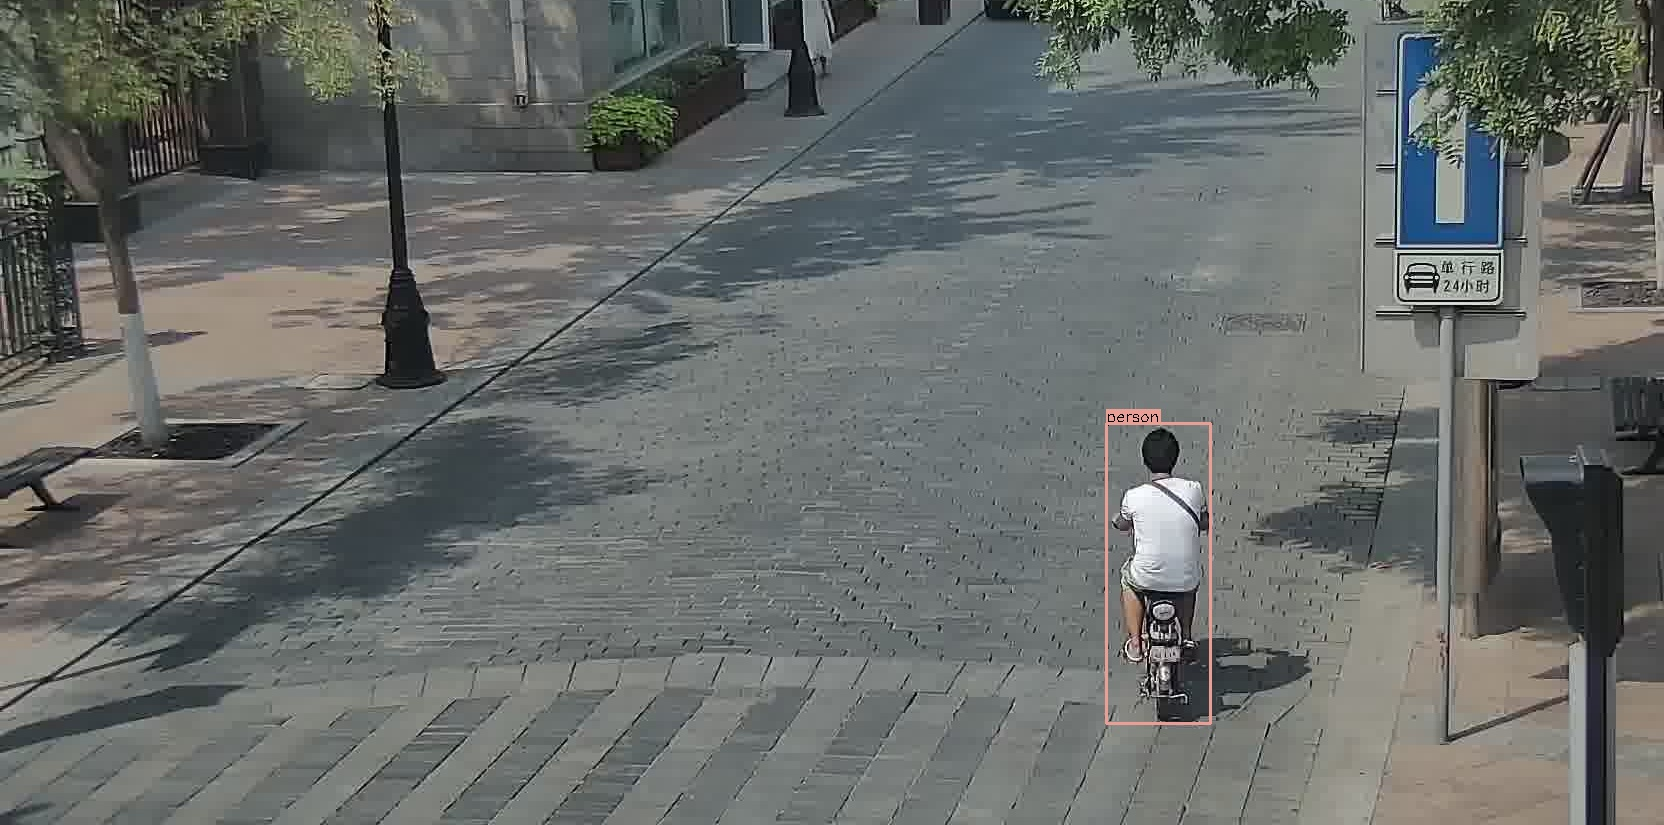

In [38]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img13.jpg", vis_thresh=0.5, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

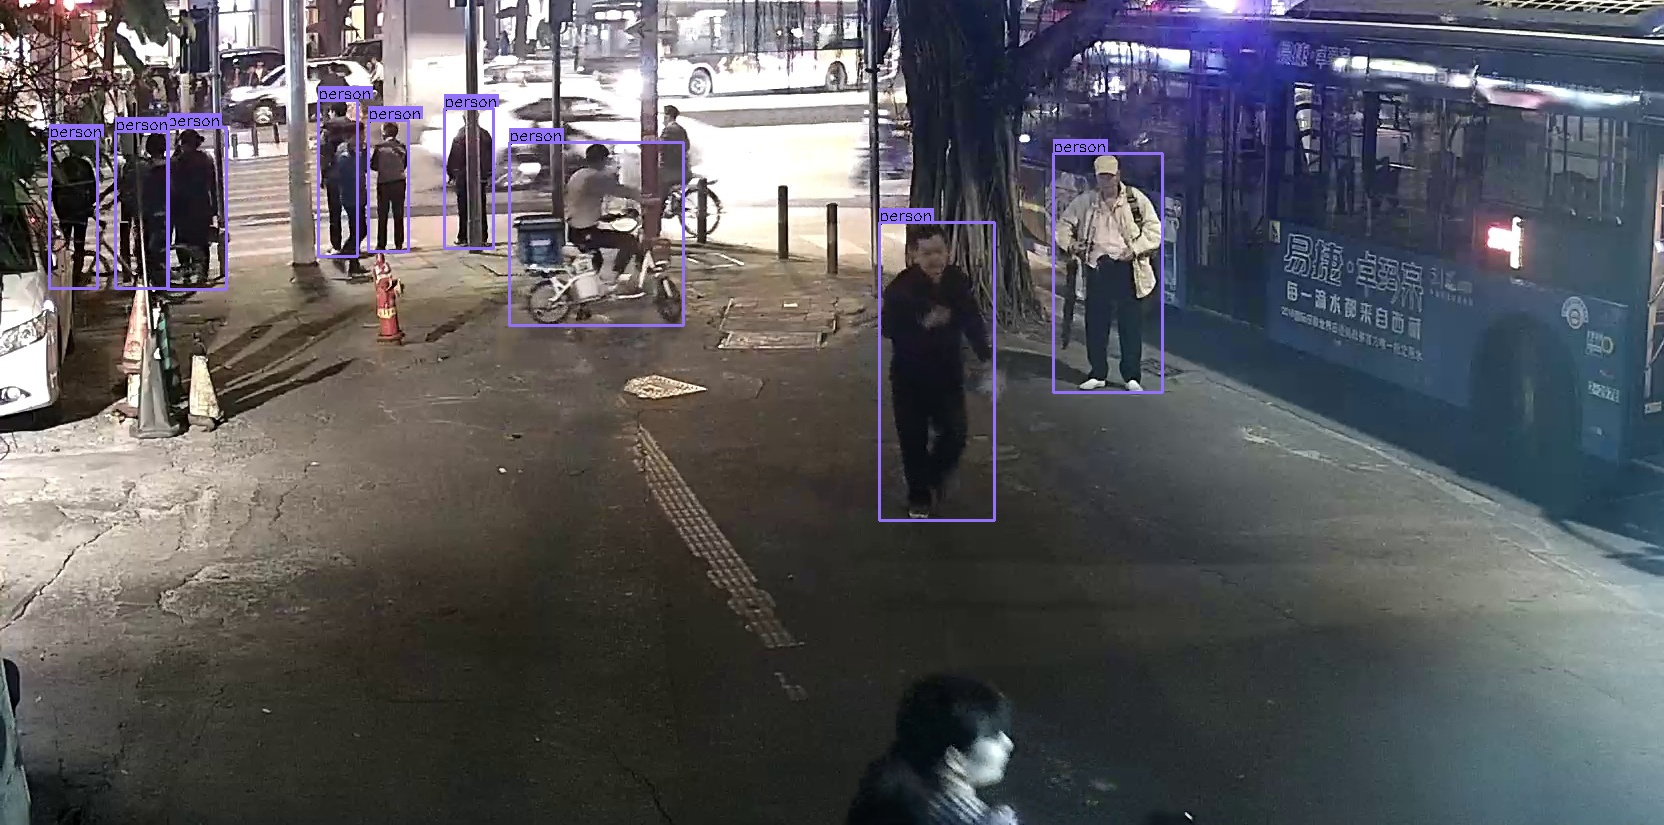

In [46]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img14.jpg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

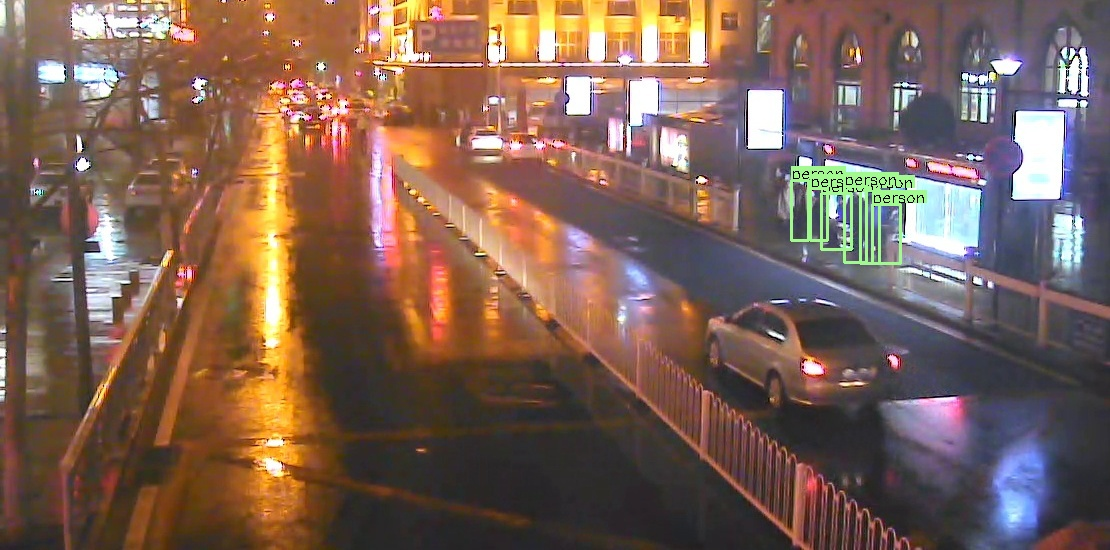

In [47]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/person_test/img15.jpg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')